# Object Detection leveraging YOLO with OpenCV in Python

Object detection has become a crucial aspect of computer vision, enabling applications ranging from security surveillance to autonomous driving. OpenCV, a widely used computer vision library, has enhanced its capabilities by incorporating the `dnn` (*Deep Neural Network*) module, which allows users to run inference on pre-trained deep learning models from popular frameworks such as Caffe, Torch, and TensorFlow.

When it comes to object detection, some of the most effective and widely adopted frameworks include:

**YOLO (You Only Look Once)**: Known for its speed and efficiency, YOLO treats object detection as a single regression problem, making it incredibly fast while maintaining reasonable accuracy.

**SSD (Single Shot MultiBox Detector)**: SSD is another real-time object detection framework that balances speed and accuracy by predicting bounding boxes and class scores directly from feature maps.

**Faster R-CNN (Region-Based Convolutional Neural Networks)**: Renowned for its high accuracy, Faster R-CNN uses a two-stage process to generate region proposals and then classify objects, making it suitable for applications where precision is critical.

OpenCV's `dnn` module has support for running YOLO/DarkNet models, expanding its utility in object detection tasks. This allows developers to leverage YOLO's strengths directly within the OpenCV framework, enabling efficient and straightforward integration into various applications.

In this guide, we will explore how to use OpenCV's `dnn` module to perform object detection using the YOLO framework. We will walk through the process of loading a pre-trained YOLO model, running inference on images, and visualizing the detected objects with bounding boxes. By the end of this tutorial, you'll have a solid understanding of how to implement YOLO-based object detection in Python using OpenCV, along with insights into the practical applications and advantages of this approach.

In [38]:
# Importing the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set file paths directly
image_path = "D:\Projects\Object Detection using YOLO\car.jpg"
config_path = "D:\Projects\Object Detection using YOLO\yolov3.cfg"
weights_path = "D:\Projects\Object Detection using YOLO\yolov3.weights"
classes_path = "D:\Projects\Object Detection using YOLO\yolov3.txt"

# Load the image
image = cv2.imread(image_path)

# Get image dimensions
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

# Load the class labels
classes = None
with open(classes_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Generate random colors for the classes
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))


Here, we are loading the *YOLO* model and also preparing the image for model. 

In [39]:
# Load the YOLO model
net = cv2.dnn.readNet(weights_path, config_path)

# Prepare the image for the YOLO model
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Function to get the output layers
def get_output_layers(net):
    layer_names = net.getLayerNames()
    try:
        output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    except:
        output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

# Perform the forward pass
outs = net.forward(get_output_layers(net))

# Initialize lists for detected class IDs, confidences, and bounding boxes
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# Process the output
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# Apply Non-Maximum Suppression to eliminate redundant overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# Function to draw the bounding box and label on the image
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

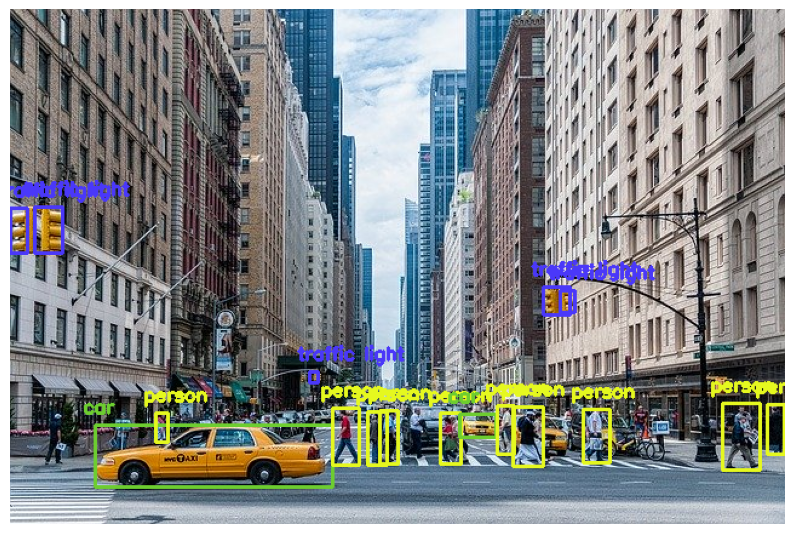

True

In [40]:
# Draw bounding boxes for each detected object
for i in indices:
    box = boxes[i]
    x, y, w, h = box[0], box[1], box[2], box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# Convert the image from BGR to RGB for display in Jupyter Notebook
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Save the resulting image
cv2.imwrite("object-detection.jpg", image)
